In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import chain, combinations
import math

def comb(n,r):
    f = math.factorial
    ans = f(n) // f(r) // f(n-r)
    return ans

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

max_ele_length=2

poset=list(powerset(list(range(1,max_ele_length+1))))

L=nx.Graph()

for j in range(max_ele_length+1):
  x=2**(max_ele_length-1)
  x=x-(comb(max_ele_length,j)//2)
  for i in poset:
    if (len(i)==j):
      L.add_node(i,pos=(x,j))
      x+=1

for j in range(max_ele_length+1):
  for k in poset:
    if len(k)==j:
      for i in poset:
        if set(k).issubset(set(i)) and len(i)==len(k)+1:
          L.add_edge(k,i)



pos=nx.get_node_attributes(L,'pos')


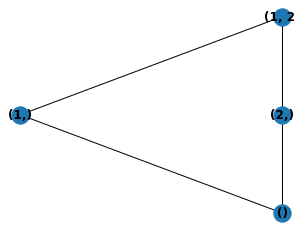

In [ ]:
# nx.draw(L,pos,with_labels = True) 
plt.figure(figsize =(2**(max_ele_length), max_ele_length+1)) 
nx.draw(L,pos, with_labels=True, font_weight='bold')

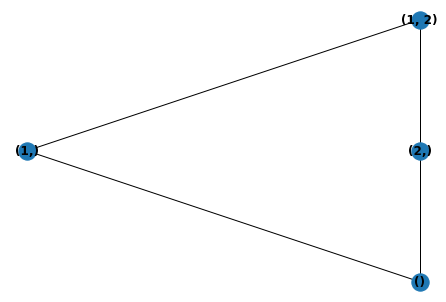

In [ ]:
ko=1
for a in poset:
  I=nx.Graph()
  ideal=[]
  for ab in poset:
    if set(ab).issubset(set(a)):
      ideal.append(ab)
  le=len(max(ideal,key=len))

  for j in range(le+1):
    x=2**(le-1)
    x=x-(comb(le,j)//2)
    for i in ideal:
      if (len(i)==j):
        I.add_node(i,pos=(x,j))
        x+=1
  
  for j in range(le+1):
    for k in ideal:
      if len(k)==j:
        for i in ideal:
          if set(k).issubset(set(i)) and len(i)==len(k)+1:
            I.add_edge(k,i)
  
  pos=nx.get_node_attributes(I,'pos')
  
  name="ideal_" + str(ko) +".png"
  
  plt.clf()
  nx.draw(I,pos, with_labels=True, font_weight='bold')
  
  plt.savefig(name)
  ko+=1